In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
dataset = pd.read_csv('sat.csv')

In [3]:
type(dataset)

pandas.core.frame.DataFrame

In [4]:
dataset

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [5]:
# linearity check

In [6]:
x1 = dataset['SAT']

In [7]:
x1

0     1714
1     1664
2     1760
3     1685
4     1693
      ... 
79    1936
80    1810
81    1987
82    1962
83    2050
Name: SAT, Length: 84, dtype: int64

In [8]:
y = dataset['GPA']

In [9]:
y

0     2.40
1     2.52
2     2.54
3     2.74
4     2.83
      ... 
79    3.71
80    3.71
81    3.73
82    3.76
83    3.81
Name: GPA, Length: 84, dtype: float64

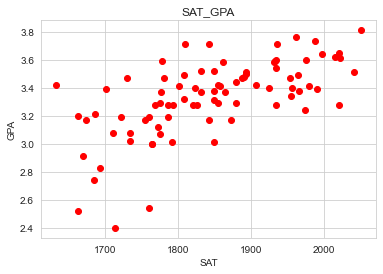

In [10]:
# scatter plot

plt.scatter(x1,y, color = 'red')
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.title('SAT_GPA')
plt.show()

In [11]:
# statsmodel

In [12]:
import statsmodels.api as sm

In [13]:
x = sm.add_constant(x1)

In [14]:
x

,const,SAT
0,1.0,1714
1,1.0,1664
2,1.0,1760
3,1.0,1685
4,1.0,1693
...,...,...
79,1.0,1936
80,1.0,1810
81,1.0,1987
82,1.0,1962


In [15]:
model = sm.OLS(y,x).fit()

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Fri, 18 Feb 2022   Prob (F-statistic):           7.20e-11
Time:                        08:52:24   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
test = pd.DataFrame(data=[1600,1950,1500],columns=['SAT'])

In [18]:
test

,SAT
0,1600
1,1950
2,1500


In [19]:
test = sm.add_constant(test)

In [20]:
test

,const,SAT
0,1.0,1600
1,1.0,1950
2,1.0,1500


In [21]:
model.predict(test)

0    2.924141
1    3.503632
2    2.758572
dtype: float64

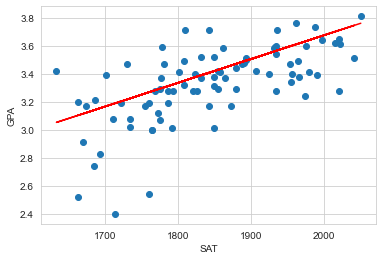

In [22]:
yhat = 0.2750+0.0017*x1
plt.scatter(x1,y)
plt.plot(x1,yhat,color='red')
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()

In [24]:
# for prediction ----> significant variable , insignificant variable

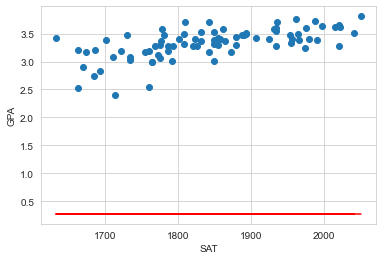

In [26]:
# taking b1 = 0 ---> b1 is ("SAT")
# to check if b1 is signifinat variable to predict y ("GPA")
# plot will show that b1 value is signifiant to predict GPA

yhat = 0.2750+0.0*x1
plt.scatter(x1,y)
plt.plot(x1,yhat,color='red')
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()